In [28]:
import pandas as pd
import numpy as np
from sklearn.tree import export_text, DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [4]:
df = pd.read_csv("stress_detection.csv")
df

,participant_id,day,PSS_score,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism,sleep_time,wake_time,sleep_duration,PSQI_score,call_duration,num_calls,num_sms,screen_on_time,skin_conductance,accelerometer,mobility_radius,mobility_distance
0,1,1,34,2.322732,4.332193,1.185878,1.570213,3.782094,7.726792,5.190660,6.572069,1,3.924527,12,32,10.703714,3.115730,0.161717,1.145179,2.196851
1,1,2,37,1.761436,3.254120,3.907281,4.072512,1.997145,7.312674,6.170717,8.030168,4,58.318004,3,41,11.012939,0.959144,0.985587,1.021133,0.737825
2,1,3,30,3.025887,1.855002,2.045900,2.317493,3.619225,6.992060,5.318825,7.102420,1,4.941043,4,48,4.877372,3.311629,1.877445,0.478179,0.911673
3,1,4,16,1.948370,4.966676,3.345225,1.607756,3.583524,8.886914,8.061075,8.123294,3,0.295373,11,38,3.462956,0.625721,0.494921,0.630549,3.911418
4,1,5,32,3.343484,2.065936,3.137843,2.118061,2.567347,7.811705,7.312145,7.785143,3,22.300571,17,17,4.861046,0.622609,1.342600,0.254090,1.605132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,100,26,30,2.529821,2.339608,1.321208,4.204331,4.890738,8.823033,8.703758,8.661936,2,59.106125,0,1,11.339248,4.045863,1.694037,0.859401,4.123621
2996,100,27,33,1.319100,4.500507,4.816983,2.416180,4.195933,5.260243,5.890244,6.456058,4,56.137068,12,17,10.694380,2.169768,1.657737,0.108480,2.242326
2997,100,28,30,1.899102,3.930147,4.047799,3.163160,2.559401,6.425568,7.978066,7.188921,3,58.102473,13,21,8.646478,4.995654,1.046666,0.508623,2.088313
2998,100,29,28,1.472408,1.712893,1.245082,4.187222,4.558563,5.453843,8.859173,7.355107,4,44.220070,17,10,4.086836,4.897873,1.605314,0.444716,4.741065


In [ ]:
# Primitive cross-validation. Separating randomly has the same effect.
df_train = df.head(2500)
df_test = df.tail(500)

In [ ]:
# Drop variables that are redundant or not useful
X_train, y_train = df_train.drop(columns=["PSS_score", "participant_id", "day", "sleep_time", "wake_time", "PSQI_score"]), df_train.PSS_score
X_test, y_test = df_test.drop(columns=['PSS_score', 'participant_id', "day", "sleep_time", "wake_time", "PSQI_score"]), df_test['PSS_score']

In [20]:
model = DecisionTreeRegressor(criterion='squared_error', max_depth=5)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

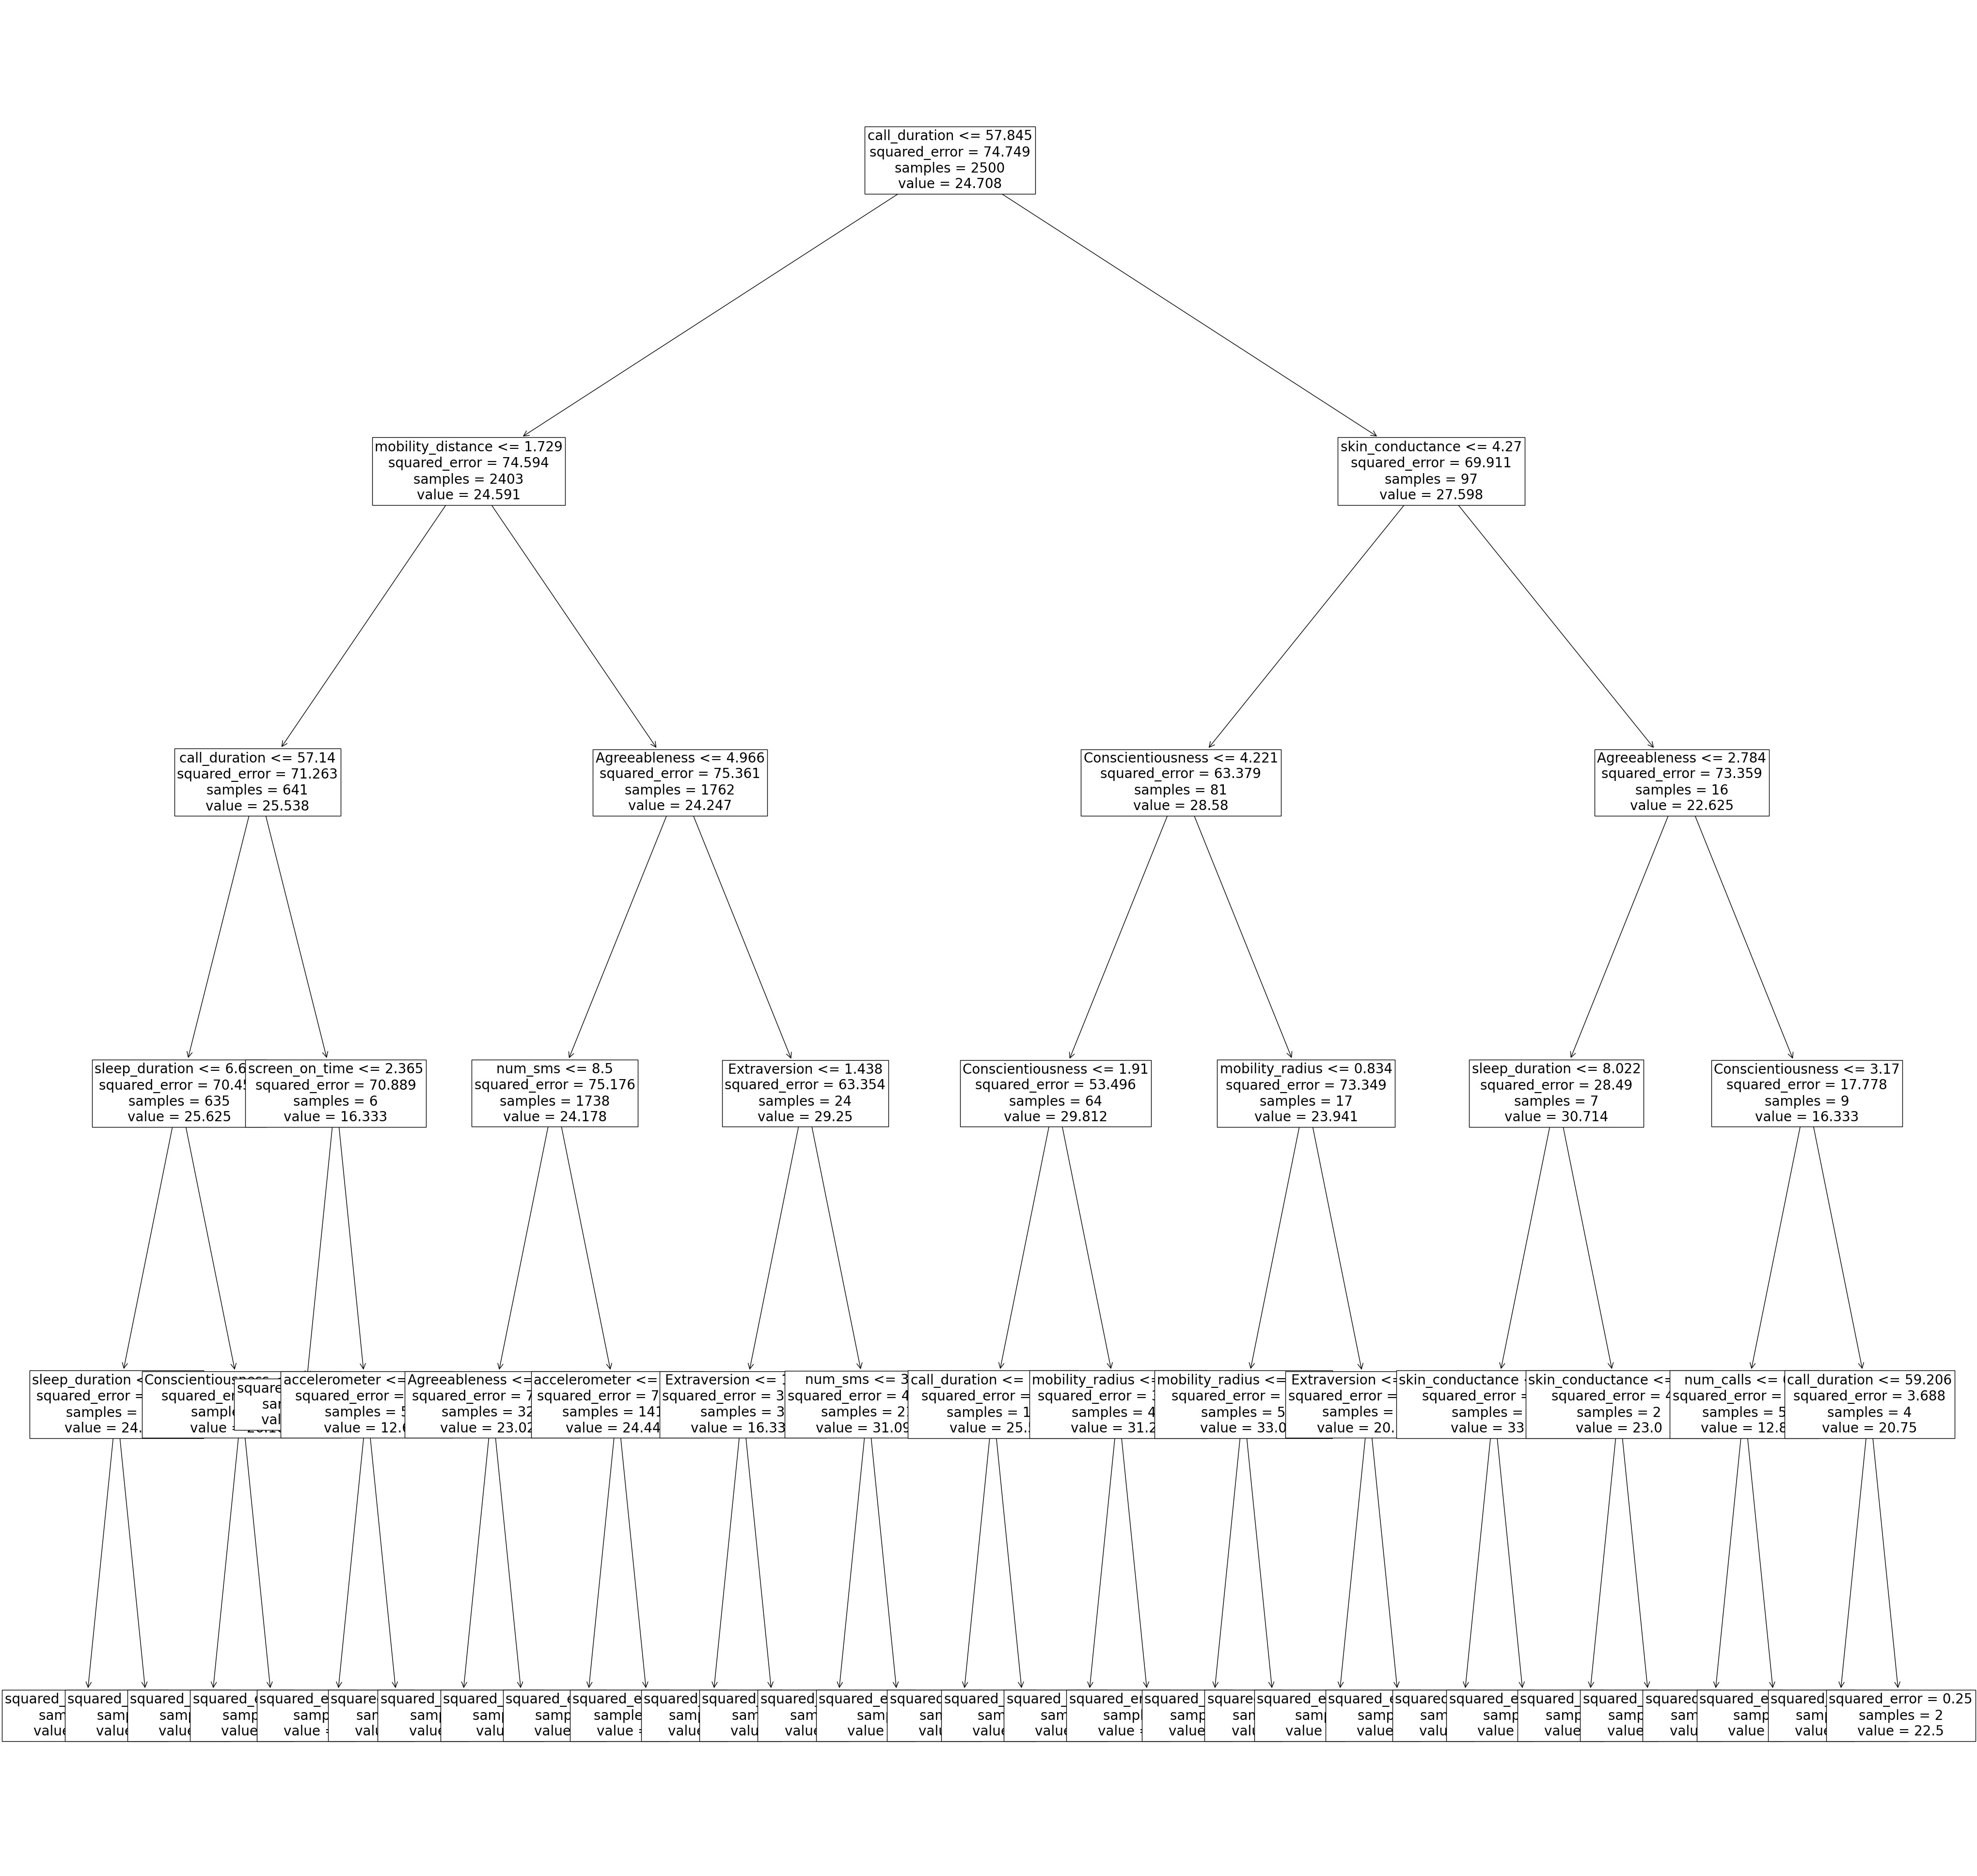

In [21]:
fig = plt.figure(figsize=(50, 50))
_ = tree.plot_tree(model, fontsize=20, feature_names=X_train.columns)

In [26]:
y_hat_model = model.predict(X_test)
mean_squared_error(y_true=y_test, y_pred=y_hat_model)

79.11028253165117

In [27]:
y_hat_mean = [np.mean(y_train)] * len(X_test)
mean_squared_error(y_true=y_test, y_pred=y_hat_mean)

71.496208

In [ ]:
df

,participant_id,day,PSS_score,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism,sleep_time,wake_time,sleep_duration,PSQI_score,call_duration,num_calls,num_sms,screen_on_time,skin_conductance,accelerometer,mobility_radius,mobility_distance
0,1,1,34,2.322732,4.332193,1.185878,1.570213,3.782094,7.726792,5.190660,6.572069,1,3.924527,12,32,10.703714,3.115730,0.161717,1.145179,2.196851
1,1,2,37,1.761436,3.254120,3.907281,4.072512,1.997145,7.312674,6.170717,8.030168,4,58.318004,3,41,11.012939,0.959144,0.985587,1.021133,0.737825
2,1,3,30,3.025887,1.855002,2.045900,2.317493,3.619225,6.992060,5.318825,7.102420,1,4.941043,4,48,4.877372,3.311629,1.877445,0.478179,0.911673
3,1,4,16,1.948370,4.966676,3.345225,1.607756,3.583524,8.886914,8.061075,8.123294,3,0.295373,11,38,3.462956,0.625721,0.494921,0.630549,3.911418
4,1,5,32,3.343484,2.065936,3.137843,2.118061,2.567347,7.811705,7.312145,7.785143,3,22.300571,17,17,4.861046,0.622609,1.342600,0.254090,1.605132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,100,26,30,2.529821,2.339608,1.321208,4.204331,4.890738,8.823033,8.703758,8.661936,2,59.106125,0,1,11.339248,4.045863,1.694037,0.859401,4.123621
2996,100,27,33,1.319100,4.500507,4.816983,2.416180,4.195933,5.260243,5.890244,6.456058,4,56.137068,12,17,10.694380,2.169768,1.657737,0.108480,2.242326
2997,100,28,30,1.899102,3.930147,4.047799,3.163160,2.559401,6.425568,7.978066,7.188921,3,58.102473,13,21,8.646478,4.995654,1.046666,0.508623,2.088313
2998,100,29,28,1.472408,1.712893,1.245082,4.187222,4.558563,5.453843,8.859173,7.355107,4,44.220070,17,10,4.086836,4.897873,1.605314,0.444716,4.741065


In [49]:
used_variables = ["Openness", "Conscientiousness", "Extraversion", "Agreeableness", "Neuroticism", "sleep_duration", "screen_on_time", "mobility_distance"]
# used_variables = ["Openness", "Neuroticism", "mobility_distance"]
X_train2 = df_train[used_variables]
X_test2 = df_test[used_variables]

In [50]:
linear_model = LinearRegression()
linear_model.fit(X_train2, y_train)

LinearRegression()

In [51]:
linear_model.coef_

array([ 0.06712171,  0.11594336, -0.01145669,  0.01742614,  0.18086476,
       -0.07917727,  0.01378986, -0.2700791 ])

In [52]:
y_hat2_linear = linear_model.predict(X_test2)
mean_squared_error(y_true=y_test, y_pred=y_hat2_linear)

71.74332517483627

In [48]:
y_hat_mean = [np.mean(y_train)] * len(X_test2)
mean_squared_error(y_true=y_test, y_pred=y_hat_mean)

71.496208